In [1]:
### Version : Python 3.10.12
### Coding : UTF-8

In [2]:
### We import packages

# To manage dataframes
import numpy as np
import pandas as pd

# To do the clustering
from sklearn.cluster import KMeans

# To realize graphs
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [3]:
### We import our python files

import preprocessing

In [4]:
### We import our dataframes

lidar_easy = preprocessing.lidar_easy
lidar_medium = preprocessing.lidar_medium
lidar_hard = preprocessing.lidar_hard
lidar_extrahard = preprocessing.lidar_extrahard

list_df = preprocessing.list_df

In [5]:
# We check what the dataframes look like
lidar_easy.head(n = 5)

,index,x,y,z,x_norm,y_norm,z_norm,x_rotated,y_rotated
0,0,12.027449,-21.919416,11.557937,0.970574,0.010484,0.956772,0.045431,-25.002366
1,7,11.780415,-21.631120,11.554015,0.960897,0.016961,0.954437,-0.033131,-24.630925
2,8,11.802714,-21.606439,11.468175,0.961770,0.017515,0.903337,-0.001729,-24.619956
3,12,11.725748,-21.450815,11.473142,0.958755,0.021011,0.906293,0.005343,-24.446484
4,13,11.658920,-21.392229,11.492596,0.956138,0.022327,0.917874,-0.025213,-24.363030


In [6]:
### Clustering
# We use Kmeans to perform the clustering
# We know that for easy, hard and extrahard files, there are only 3 clusters
# For medium file, there are 7 clusters

var = ["x_rotated"]
i = 0
for df in list_df :
    if i == 1 :
        nb_clusters = 7
    else :
        nb_clusters = 3
    model = KMeans(n_clusters = nb_clusters, init = "k-means++", n_init = 10, random_state = 42)
    df["cluster"] = model.fit(df[var]).labels_
    i+=1

In [7]:
# We check result
lidar_easy

,index,x,y,z,x_norm,y_norm,z_norm,x_rotated,y_rotated,cluster
0,0,12.027449,-21.919416,11.557937,0.970574,0.010484,0.956772,0.045431,-25.002366,2
1,7,11.780415,-21.631120,11.554015,0.960897,0.016961,0.954437,-0.033131,-24.630925,2
2,8,11.802714,-21.606439,11.468175,0.961770,0.017515,0.903337,-0.001729,-24.619956,2
3,12,11.725748,-21.450815,11.473142,0.958755,0.021011,0.906293,0.005343,-24.446484,2
4,13,11.658920,-21.392229,11.492596,0.956138,0.022327,0.917874,-0.025213,-24.363030,2
...,...,...,...,...,...,...,...,...,...,...
1497,2997,-12.594755,21.327550,11.458369,0.006053,0.982011,0.897499,-0.827054,24.754963,1
1498,2998,-12.662449,21.386325,11.509484,0.003402,0.983331,0.927928,-0.858279,24.838999,1
1499,2999,-12.702087,21.339329,11.480640,0.001849,0.982275,0.910757,-0.915597,24.816761,1
1500,3001,-12.749286,21.452882,11.526176,0.000000,0.984826,0.937865,-0.902573,24.939041,1


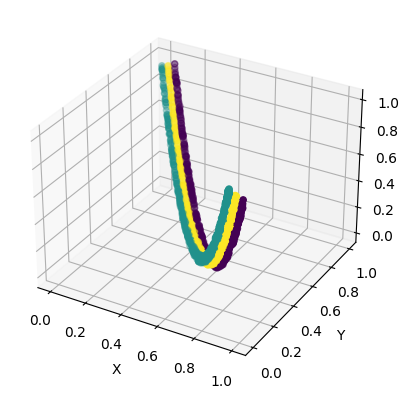

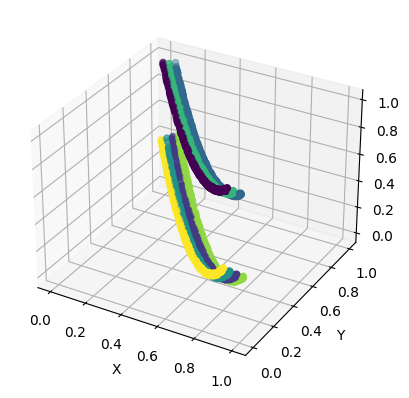

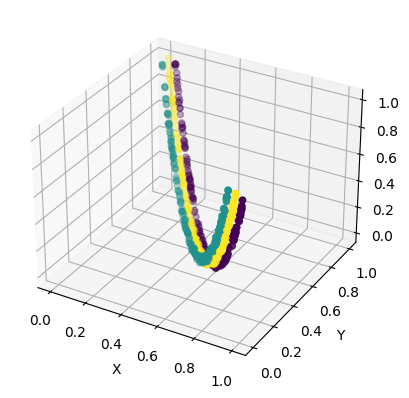

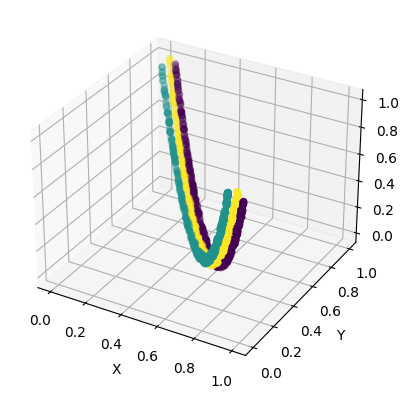

In [8]:
### We visualize result

for df in list_df : 
    x = df['x_norm']
    y = df['y_norm']
    z = df['z_norm']
    color = df['cluster']
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x, y, z, c=color, marker='o', cmap = 'viridis')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show()

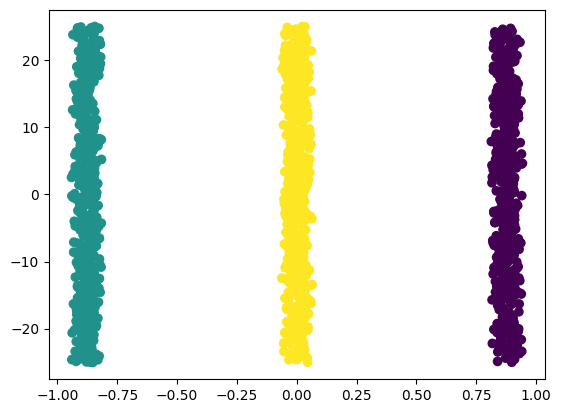

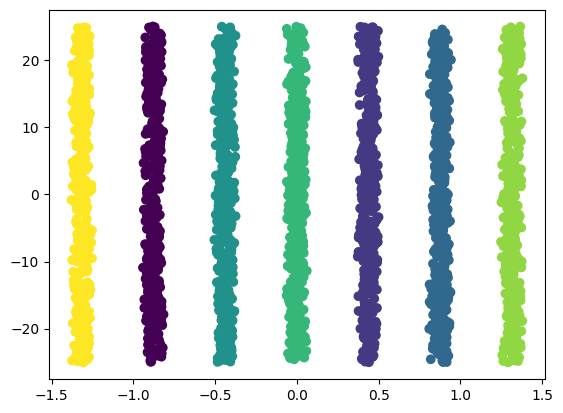

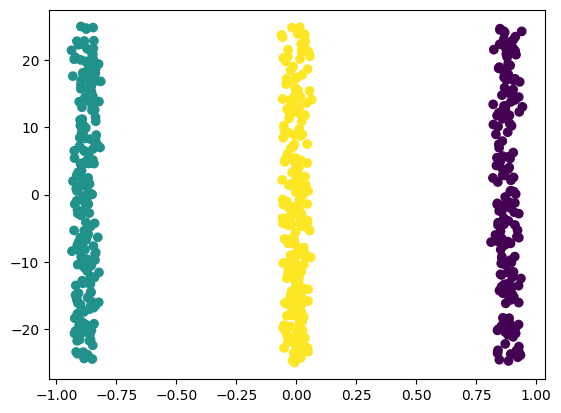

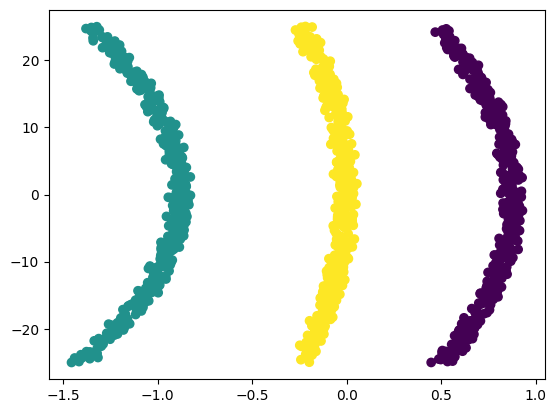

In [9]:
### We check that clustering was perfectly done

for df in list_df : 
    x = df['x_rotated']
    y = df['y_rotated']
    color = df['cluster']
    plt.scatter(x, y, c=color, cmap = 'viridis')
    plt.show()